<a href="https://colab.research.google.com/github/KseniiaTsyganova/bootstrap-regularization/blob/main/BOOTSTRAP_REGULARIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# simple bootstrap regularization method

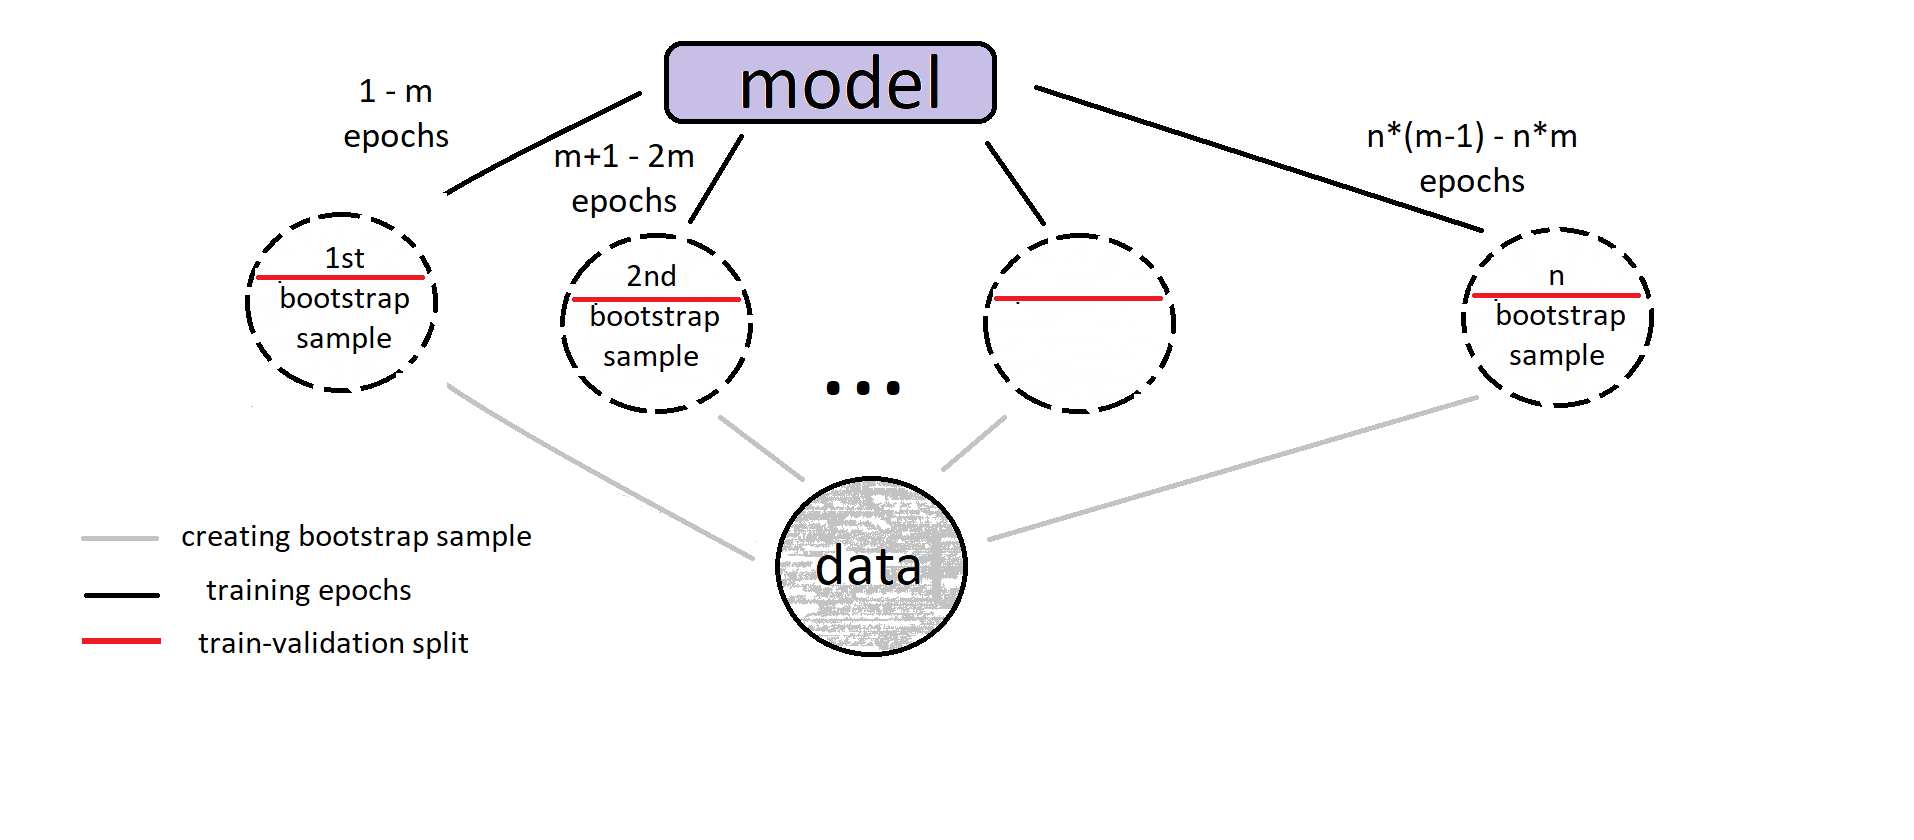

In [1]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_california_housing

Mounted at /content/drive


In [2]:
BOOTSTRAP_EPOCHS = 50
BOOTSTRAP_SAMPLES = 10 
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 64
EPOCHS = 500
TEST_SIZE = 0.2
RS = 42

For regular training we will create a simple neural network and we will train it during 500 epochs.

For training with bootstrap samples we will create second model with the same architecture. 
We will create 10 bootstrap samples and train our second model sequentially on each of them for 50 epochs. So the final number of training epochs will be the same as for the first model - 500.

# Binary classification

## Experiment 1
### Mine or rock dataset
sourse:
https://www.kaggle.com/datasets/rupakroy/sonarcsv

In [3]:
data = pd.read_csv('/content/drive/MyDrive/datasets/sonar.csv')
X = data.drop(['R'], axis=1)
y = np.where(data.R == 'R', 0, 1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RS)
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [4]:
model_1 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'), 
    Dense(1, activation='sigmoid')
])

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/500
3/3 [==============================] - 1s 134ms/step - loss: 0.7069 - accuracy: 0.4697 - val_loss: 0.6545 - val_accuracy: 0.6667
Epoch 2/500
3/3 [==============================] - 0s 20ms/step - loss: 0.6874 - accuracy: 0.5000 - val_loss: 0.6364 - val_accuracy: 0.6667
Epoch 3/500
3/3 [==============================] - 0s 20ms/step - loss: 0.6772 - accuracy: 0.5000 - val_loss: 0.6206 - val_accuracy: 0.6970
Epoch 4/500
3/3 [==============================] - 0s 29ms/step - loss: 0.6650 - accuracy: 0.5606 - val_loss: 0.6240 - val_accuracy: 0.8182
Epoch 5/500
3/3 [==============================] - 0s 27ms/step - loss: 0.6505 - accuracy: 0.6970 - val_loss: 0.6326 - val_accuracy: 0.7273
Epoch 6/500
3/3 [==============================] - 0s 20ms/step - loss: 0.6393 - accuracy: 0.7424 - val_loss: 0.6404 - val_accuracy: 0.6667
Epoch 7/500
3/3 [==============================] - 0s 30ms/step - loss: 0.6256 - accuracy: 0.7879 - val_loss: 0.6274 - val_accuracy: 0.6667
Epoch 8/500
3/3 [==

In [5]:
model_2 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'), 
    Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

df = pd.DataFrame(columns=['loss', 'accuracy', 'val_loss', 'val_accuracy'])

for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)



Epoch 1/50
3/3 [==============================] - 1s 109ms/step - loss: 0.7145 - accuracy: 0.3561 - val_loss: 0.6796 - val_accuracy: 0.5455
Epoch 2/50
3/3 [==============================] - 0s 20ms/step - loss: 0.6731 - accuracy: 0.5833 - val_loss: 0.6792 - val_accuracy: 0.5758
Epoch 3/50
3/3 [==============================] - 0s 30ms/step - loss: 0.6594 - accuracy: 0.5833 - val_loss: 0.6826 - val_accuracy: 0.5758
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 0.6478 - accuracy: 0.5833 - val_loss: 0.6821 - val_accuracy: 0.5758
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 0.6390 - accuracy: 0.5833 - val_loss: 0.6767 - val_accuracy: 0.5758
Epoch 6/50
3/3 [==============================] - 0s 27ms/step - loss: 0.6294 - accuracy: 0.5833 - val_loss: 0.6664 - val_accuracy: 0.5758
Epoch 7/50
3/3 [==============================] - 0s 21ms/step - loss: 0.6247 - accuracy: 0.6667 - val_loss: 0.6635 - val_accuracy: 0.6061
Epoch 8/50
3/3 [==========

<ipython-input-5-776b25b7aed0>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 2/50
3/3 [==============================] - 0s 35ms/step - loss: 0.3575 - accuracy: 0.8636 - val_loss: 0.2798 - val_accuracy: 0.9394
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 0.3419 - accuracy: 0.8561 - val_loss: 0.2738 - val_accuracy: 0.9697
Epoch 4/50
3/3 [==============================] - 0s 24ms/step - loss: 0.3258 - accuracy: 0.9091 - val_loss: 0.2652 - val_accuracy: 0.9394
Epoch 5/50
3/3 [==============================] - 0s 38ms/step - loss: 0.3216 - accuracy: 0.8788 - val_loss: 0.2705 - val_accuracy: 0.8788
Epoch 6/50
3/3 [==============================] - 0s 27ms/step - loss: 0.3395 - accuracy: 0.8561 - val_loss: 0.2663 - val_accuracy: 0.8788
Epoch 7/50
3/3 [==============================] - 0s 35ms/step - loss: 0.3229 - accuracy: 0.8712 - val_loss: 0.2485 - val_accuracy: 0.9697
Epoch 8/50
3/3 [==============================] - 0s 35ms/step - loss: 0.2871 - accuracy: 0.9167 - val_loss: 0.2649 - val_accuracy: 0.9394
Epoch 9/50
3/3 [===========

<ipython-input-5-776b25b7aed0>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 77ms/step - loss: 0.2759 - accuracy: 0.9091 - val_loss: 0.2764 - val_accuracy: 0.8788
Epoch 2/50
3/3 [==============================] - 0s 37ms/step - loss: 0.2704 - accuracy: 0.9015 - val_loss: 0.2388 - val_accuracy: 0.9091
Epoch 3/50
3/3 [==============================] - 0s 37ms/step - loss: 0.2455 - accuracy: 0.9242 - val_loss: 0.2302 - val_accuracy: 0.9091
Epoch 4/50
3/3 [==============================] - 0s 39ms/step - loss: 0.2292 - accuracy: 0.9318 - val_loss: 0.2459 - val_accuracy: 0.9091
Epoch 5/50
3/3 [==============================] - 0s 28ms/step - loss: 0.2347 - accuracy: 0.9167 - val_loss: 0.3069 - val_accuracy: 0.8485
Epoch 6/50
3/3 [==============================] - 0s 45ms/step - loss: 0.2545 - accuracy: 0.8864 - val_loss: 0.3094 - val_accuracy: 0.8182
Epoch 7/50
3/3 [==============================] - 0s 40ms/step - loss: 0.2433 - accuracy: 0.9015 - val_loss: 0.2467 - val_accuracy: 0.9091
Epoch 8/50
3/3 [======================

<ipython-input-5-776b25b7aed0>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 22ms/step - loss: 0.2248 - accuracy: 0.9242 - val_loss: 0.2054 - val_accuracy: 0.9091
Epoch 3/50
3/3 [==============================] - 0s 19ms/step - loss: 0.1992 - accuracy: 0.9394 - val_loss: 0.2387 - val_accuracy: 0.8788
Epoch 4/50
3/3 [==============================] - 0s 21ms/step - loss: 0.1969 - accuracy: 0.9091 - val_loss: 0.3026 - val_accuracy: 0.8485
Epoch 5/50
3/3 [==============================] - 0s 28ms/step - loss: 0.2132 - accuracy: 0.9091 - val_loss: 0.2574 - val_accuracy: 0.8788
Epoch 6/50
3/3 [==============================] - 0s 20ms/step - loss: 0.1904 - accuracy: 0.9091 - val_loss: 0.2133 - val_accuracy: 0.8788
Epoch 7/50
3/3 [==============================] - 0s 19ms/step - loss: 0.1705 - accuracy: 0.9242 - val_loss: 0.1511 - val_accuracy: 0.9697
Epoch 8/50
3/3 [==============================] - 0s 23ms/step - loss: 0.1699 - accuracy: 0.9470 - val_loss: 0.1337 - val_accuracy: 0.9697
Epoch 9/50
3/3 [======================

<ipython-input-5-776b25b7aed0>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 20ms/step - loss: 0.1467 - accuracy: 0.9545 - val_loss: 0.0543 - val_accuracy: 1.0000
Epoch 3/50
3/3 [==============================] - 0s 19ms/step - loss: 0.1304 - accuracy: 0.9545 - val_loss: 0.0659 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 29ms/step - loss: 0.1240 - accuracy: 0.9470 - val_loss: 0.0536 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 33ms/step - loss: 0.1076 - accuracy: 0.9697 - val_loss: 0.0418 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 32ms/step - loss: 0.1022 - accuracy: 0.9470 - val_loss: 0.0480 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 34ms/step - loss: 0.1075 - accuracy: 0.9470 - val_loss: 0.0502 - val_accuracy: 1.0000
Epoch 8/50
3/3 [==============================] - 0s 27ms/step - loss: 0.0993 - accuracy: 0.9470 - val_loss: 0.0526 - val_accuracy: 1.0000
Epoch 9/50
3/3 [======================

<ipython-input-5-776b25b7aed0>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 20ms/step - loss: 0.0630 - accuracy: 0.9697 - val_loss: 0.0770 - val_accuracy: 0.9697
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0613 - accuracy: 0.9773 - val_loss: 0.0746 - val_accuracy: 0.9697
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0485 - accuracy: 0.9848 - val_loss: 0.0862 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0459 - accuracy: 0.9924 - val_loss: 0.1222 - val_accuracy: 0.9394
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0550 - accuracy: 0.9773 - val_loss: 0.1014 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 23ms/step - loss: 0.0413 - accuracy: 1.0000 - val_loss: 0.0719 - val_accuracy: 0.9697
Epoch 8/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0340 - accuracy: 0.9924 - val_loss: 0.0709 - val_accuracy: 0.9697
Epoch 9/50
3/3 [======================

<ipython-input-5-776b25b7aed0>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 2/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0695 - accuracy: 0.9697 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 3/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0611 - accuracy: 0.9697 - val_loss: 0.0287 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0546 - accuracy: 0.9773 - val_loss: 0.0275 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0440 - accuracy: 0.9848 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0404 - accuracy: 0.9848 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0365 - accuracy: 0.9924 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 8/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 9/50
3/3 [===========

<ipython-input-5-776b25b7aed0>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 58ms/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.0331 - val_accuracy: 1.0000
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 0.0489 - val_accuracy: 1.0000
Epoch 3/50
3/3 [==============================] - 0s 28ms/step - loss: 0.0256 - accuracy: 0.9924 - val_loss: 0.0600 - val_accuracy: 0.9697
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0266 - accuracy: 0.9924 - val_loss: 0.0426 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.0336 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.0326 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 1.0000
Epoch 8/50
3/3 [======================

<ipython-input-5-776b25b7aed0>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 21ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 8/50
3/3 [==============================] - 0s 24ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 9/50
3/3 [======================

<ipython-input-5-776b25b7aed0>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 20ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.0269 - val_accuracy: 0.9697
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0716 - val_accuracy: 0.9697
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.0811 - val_accuracy: 0.9697
Epoch 7/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.0494 - val_accuracy: 0.9697
Epoch 8/50
3/3 [==============================] - 0s 30ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0357 - val_accuracy: 0.9697
Epoch 9/50
3/3 [======================

<ipython-input-5-776b25b7aed0>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


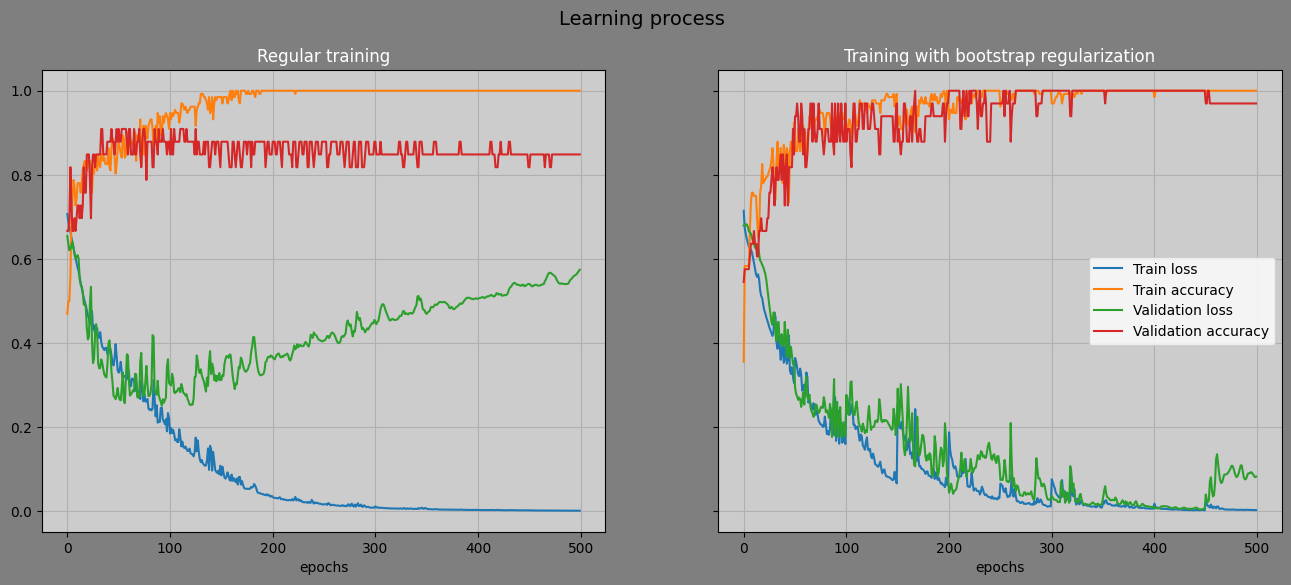

In [6]:

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train accuracy', 'Validation loss', 'Validation accuracy'], loc='best')
plt.show()



In [7]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test accuracy': [accuracy_1, accuracy_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


2/2 [==============================] - 0s 7ms/step - loss: 0.6372 - accuracy: 0.8810


,Test accuracy,Test loss
,,
Regular training,0.857143,0.765565
Boostrap regularization,0.880952,0.637208


## Experiment 2
### Sklearn breast cancer dataset

In [8]:
data = load_breast_cancer()
X = data['data']
y = data['target']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RS)
x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [9]:
model_1 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'), 
    Dense(1, activation='sigmoid')
])

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/500
6/6 [==============================] - 2s 70ms/step - loss: 17.2554 - accuracy: 0.5027 - val_loss: 5.9907 - val_accuracy: 0.4176
Epoch 2/500
6/6 [==============================] - 0s 13ms/step - loss: 6.8119 - accuracy: 0.6291 - val_loss: 0.2967 - val_accuracy: 0.9341
Epoch 3/500
6/6 [==============================] - 0s 16ms/step - loss: 3.0512 - accuracy: 0.5824 - val_loss: 0.5712 - val_accuracy: 0.9231
Epoch 4/500
6/6 [==============================] - 0s 12ms/step - loss: 1.7478 - accuracy: 0.8462 - val_loss: 0.5398 - val_accuracy: 0.9231
Epoch 5/500
6/6 [==============================] - 0s 15ms/step - loss: 1.0862 - accuracy: 0.8049 - val_loss: 0.3832 - val_accuracy: 0.9341
Epoch 6/500
6/6 [==============================] - 0s 17ms/step - loss: 0.9629 - accuracy: 0.8956 - val_loss: 0.4485 - val_accuracy: 0.9231
Epoch 7/500
6/6 [==============================] - 0s 14ms/step - loss: 0.4927 - accuracy: 0.8819 - val_loss: 0.2963 - val_accuracy: 0.9560
Epoch 8/500
6/6 [==

In [10]:
model_2 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'), 
    Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

df = pd.DataFrame(columns=['loss', 'accuracy', 'val_loss', 'val_accuracy'])


for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 1/50
6/6 [==============================] - 1s 43ms/step - loss: 13.9812 - accuracy: 0.4670 - val_loss: 14.1445 - val_accuracy: 0.6813
Epoch 2/50
6/6 [==============================] - 0s 12ms/step - loss: 9.7247 - accuracy: 0.5659 - val_loss: 9.8718 - val_accuracy: 0.3187
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 4.6375 - accuracy: 0.6291 - val_loss: 1.5775 - val_accuracy: 0.8791
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 2.8525 - accuracy: 0.6703 - val_loss: 0.8538 - val_accuracy: 0.8791
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 1.4578 - accuracy: 0.8599 - val_loss: 0.9260 - val_accuracy: 0.8901
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 1.1341 - accuracy: 0.8516 - val_loss: 0.7732 - val_accuracy: 0.8901
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 0.8551 - accuracy: 0.9066 - val_loss: 0.6595 - val_accuracy: 0.8901
Epoch 8/50
6/6 [==========

<ipython-input-10-01fd28bd0b84>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 29ms/step - loss: 0.1457 - accuracy: 0.9341 - val_loss: 0.1755 - val_accuracy: 0.8901
Epoch 2/50
6/6 [==============================] - 0s 15ms/step - loss: 0.2302 - accuracy: 0.9148 - val_loss: 0.2920 - val_accuracy: 0.9121
Epoch 3/50
6/6 [==============================] - 0s 16ms/step - loss: 0.2750 - accuracy: 0.8984 - val_loss: 0.2904 - val_accuracy: 0.9121
Epoch 4/50
6/6 [==============================] - 0s 18ms/step - loss: 0.2485 - accuracy: 0.9231 - val_loss: 0.1887 - val_accuracy: 0.9341
Epoch 5/50
6/6 [==============================] - 0s 16ms/step - loss: 0.2430 - accuracy: 0.9341 - val_loss: 0.2848 - val_accuracy: 0.9231
Epoch 6/50
6/6 [==============================] - 0s 16ms/step - loss: 0.3997 - accuracy: 0.8709 - val_loss: 0.2705 - val_accuracy: 0.9231
Epoch 7/50
6/6 [==============================] - 0s 16ms/step - loss: 0.2593 - accuracy: 0.9203 - val_loss: 0.1778 - val_accuracy: 0.9121
Epoch 8/50
6/6 [======================

<ipython-input-10-01fd28bd0b84>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 25ms/step - loss: 0.1554 - accuracy: 0.9478 - val_loss: 0.2105 - val_accuracy: 0.9341
Epoch 2/50
6/6 [==============================] - 0s 15ms/step - loss: 0.1980 - accuracy: 0.9341 - val_loss: 0.2494 - val_accuracy: 0.9670
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1644 - accuracy: 0.9533 - val_loss: 0.4393 - val_accuracy: 0.8681
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 0.1727 - accuracy: 0.9341 - val_loss: 0.2241 - val_accuracy: 0.9341
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 0.3173 - accuracy: 0.9231 - val_loss: 0.1846 - val_accuracy: 0.9560
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 0.3473 - accuracy: 0.9011 - val_loss: 0.5957 - val_accuracy: 0.8352
Epoch 7/50
6/6 [==============================] - 0s 12ms/step - loss: 0.2060 - accuracy: 0.9341 - val_loss: 0.2193 - val_accuracy: 0.9560
Epoch 8/50
6/6 [=======================

<ipython-input-10-01fd28bd0b84>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 13ms/step - loss: 0.4359 - accuracy: 0.8956 - val_loss: 0.1763 - val_accuracy: 0.9451
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 0.7709 - accuracy: 0.8407 - val_loss: 0.4707 - val_accuracy: 0.9011
Epoch 4/50
6/6 [==============================] - 0s 13ms/step - loss: 0.4586 - accuracy: 0.9121 - val_loss: 0.1844 - val_accuracy: 0.9451
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.2185 - accuracy: 0.9341 - val_loss: 0.3237 - val_accuracy: 0.9121
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 0.2716 - accuracy: 0.9286 - val_loss: 0.1932 - val_accuracy: 0.9560
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 0.2793 - accuracy: 0.9231 - val_loss: 0.6250 - val_accuracy: 0.8901
Epoch 8/50
6/6 [==============================] - 0s 12ms/step - loss: 0.4829 - accuracy: 0.8901 - val_loss: 0.3069 - val_accuracy: 0.9121
Epoch 9/50
6/6 [==========================

<ipython-input-10-01fd28bd0b84>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 25ms/step - loss: 0.3582 - accuracy: 0.9313 - val_loss: 0.2664 - val_accuracy: 0.9231
Epoch 2/50
6/6 [==============================] - 0s 10ms/step - loss: 0.2584 - accuracy: 0.9505 - val_loss: 0.1778 - val_accuracy: 0.9670
Epoch 3/50
6/6 [==============================] - 0s 13ms/step - loss: 0.2080 - accuracy: 0.9368 - val_loss: 0.1757 - val_accuracy: 0.9670
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1785 - accuracy: 0.9505 - val_loss: 0.2637 - val_accuracy: 0.9560
Epoch 5/50
6/6 [==============================] - 0s 12ms/step - loss: 0.2574 - accuracy: 0.9368 - val_loss: 0.3506 - val_accuracy: 0.9011
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.2509 - accuracy: 0.9396 - val_loss: 0.2002 - val_accuracy: 0.9560
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.2401 - accuracy: 0.9423 - val_loss: 0.2602 - val_accuracy: 0.9451
Epoch 8/50
6/6 [=======================

<ipython-input-10-01fd28bd0b84>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 2/50
6/6 [==============================] - 0s 13ms/step - loss: 0.2223 - accuracy: 0.9396 - val_loss: 0.5735 - val_accuracy: 0.8571
Epoch 3/50
6/6 [==============================] - 0s 14ms/step - loss: 0.2026 - accuracy: 0.9478 - val_loss: 0.3938 - val_accuracy: 0.9231
Epoch 4/50
6/6 [==============================] - 0s 13ms/step - loss: 0.1731 - accuracy: 0.9451 - val_loss: 0.5280 - val_accuracy: 0.9231
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.3214 - accuracy: 0.9258 - val_loss: 0.4547 - val_accuracy: 0.9011
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1146 - accuracy: 0.9643 - val_loss: 0.3598 - val_accuracy: 0.9231
Epoch 7/50
6/6 [==============================] - 0s 13ms/step - loss: 0.1427 - accuracy: 0.9533 - val_loss: 0.3546 - val_accuracy: 0.9231
Epoch 8/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1707 - accuracy: 0.9505 - val_loss: 0.4328 - val_accuracy: 0.8901
Epoch 9/50
6/6 [==============

<ipython-input-10-01fd28bd0b84>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 10ms/step - loss: 0.2369 - accuracy: 0.9368 - val_loss: 0.1864 - val_accuracy: 0.9341
Epoch 3/50
6/6 [==============================] - 0s 10ms/step - loss: 0.1783 - accuracy: 0.9560 - val_loss: 0.2900 - val_accuracy: 0.9231
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1750 - accuracy: 0.9505 - val_loss: 0.1078 - val_accuracy: 0.9670
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1281 - accuracy: 0.9533 - val_loss: 0.0937 - val_accuracy: 0.9560
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 0.1214 - accuracy: 0.9588 - val_loss: 0.1001 - val_accuracy: 0.9560
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.1067 - accuracy: 0.9615 - val_loss: 0.1559 - val_accuracy: 0.9670
Epoch 8/50
6/6 [==============================] - 0s 13ms/step - loss: 0.1067 - accuracy: 0.9560 - val_loss: 0.1031 - val_accuracy: 0.9560
Epoch 9/50
6/6 [========================

<ipython-input-10-01fd28bd0b84>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 28ms/step - loss: 0.4271 - accuracy: 0.8901 - val_loss: 0.2883 - val_accuracy: 0.9560
Epoch 2/50
6/6 [==============================] - 0s 15ms/step - loss: 0.2585 - accuracy: 0.9231 - val_loss: 0.1265 - val_accuracy: 0.9560
Epoch 3/50
6/6 [==============================] - 0s 18ms/step - loss: 0.1715 - accuracy: 0.9478 - val_loss: 0.1088 - val_accuracy: 0.9560
Epoch 4/50
6/6 [==============================] - 0s 13ms/step - loss: 0.1569 - accuracy: 0.9533 - val_loss: 0.0855 - val_accuracy: 0.9670
Epoch 5/50
6/6 [==============================] - 0s 13ms/step - loss: 0.1534 - accuracy: 0.9396 - val_loss: 0.3964 - val_accuracy: 0.8791
Epoch 6/50
6/6 [==============================] - 0s 15ms/step - loss: 0.3415 - accuracy: 0.8929 - val_loss: 0.1015 - val_accuracy: 0.9341
Epoch 7/50
6/6 [==============================] - 0s 15ms/step - loss: 0.1597 - accuracy: 0.9451 - val_loss: 0.1534 - val_accuracy: 0.9341
Epoch 8/50
6/6 [======================

<ipython-input-10-01fd28bd0b84>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 12ms/step - loss: 0.2046 - accuracy: 0.9341 - val_loss: 0.1971 - val_accuracy: 0.9451
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 0.1658 - accuracy: 0.9478 - val_loss: 0.1706 - val_accuracy: 0.9560
Epoch 4/50
6/6 [==============================] - 0s 13ms/step - loss: 0.1536 - accuracy: 0.9478 - val_loss: 0.1506 - val_accuracy: 0.9451
Epoch 5/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1295 - accuracy: 0.9533 - val_loss: 0.1315 - val_accuracy: 0.9451
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1183 - accuracy: 0.9560 - val_loss: 0.1694 - val_accuracy: 0.9451
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1207 - accuracy: 0.9505 - val_loss: 0.1310 - val_accuracy: 0.9451
Epoch 8/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1650 - accuracy: 0.9451 - val_loss: 0.1266 - val_accuracy: 0.9451
Epoch 9/50
6/6 [=========================

<ipython-input-10-01fd28bd0b84>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 22ms/step - loss: 0.0878 - accuracy: 0.9753 - val_loss: 0.0604 - val_accuracy: 0.9780
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 0.1556 - accuracy: 0.9505 - val_loss: 0.0644 - val_accuracy: 0.9780
Epoch 3/50
6/6 [==============================] - 0s 13ms/step - loss: 0.1030 - accuracy: 0.9643 - val_loss: 0.1616 - val_accuracy: 0.9560
Epoch 4/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0750 - accuracy: 0.9670 - val_loss: 0.0685 - val_accuracy: 0.9670
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0886 - accuracy: 0.9615 - val_loss: 0.0484 - val_accuracy: 0.9890
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0687 - accuracy: 0.9643 - val_loss: 0.0450 - val_accuracy: 0.9890
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0547 - accuracy: 0.9725 - val_loss: 0.1869 - val_accuracy: 0.9451
Epoch 8/50
6/6 [========================

<ipython-input-10-01fd28bd0b84>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


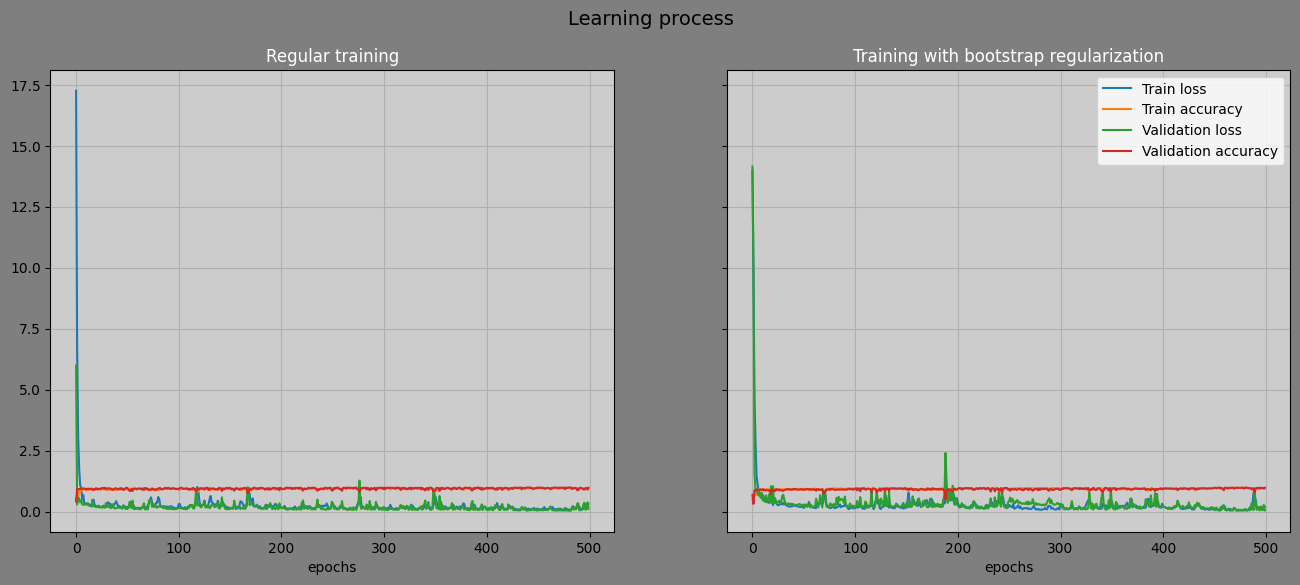

In [11]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train accuracy', 'Validation loss', 'Validation accuracy'], loc='best')
plt.show()


In [12]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test accuracy': [accuracy_1, accuracy_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


4/4 [==============================] - 0s 5ms/step - loss: 0.1442 - accuracy: 0.9561


,Test accuracy,Test loss
,,
Regular training,0.912281,0.168037
Boostrap regularization,0.956140,0.144232


# Multi-class classification

## Experiment 3
### Sklearn wine dataset

In [13]:
data = load_wine()
X = data['data']
y = data['target']
y = to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RS)
x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [14]:
model_1 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'), 
    Dense(3, activation='softmax')
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/500
2/2 [==============================] - 1s 245ms/step - loss: 25.0073 - accuracy: 0.3628 - val_loss: 4.1877 - val_accuracy: 0.5517
Epoch 2/500
2/2 [==============================] - 0s 40ms/step - loss: 11.2131 - accuracy: 0.4159 - val_loss: 14.2051 - val_accuracy: 0.3103
Epoch 3/500
2/2 [==============================] - 0s 38ms/step - loss: 13.4521 - accuracy: 0.3628 - val_loss: 28.9307 - val_accuracy: 0.1034
Epoch 4/500
2/2 [==============================] - 0s 37ms/step - loss: 13.2008 - accuracy: 0.3097 - val_loss: 4.7074 - val_accuracy: 0.5862
Epoch 5/500
2/2 [==============================] - 0s 36ms/step - loss: 10.7789 - accuracy: 0.2920 - val_loss: 16.1492 - val_accuracy: 0.3103
Epoch 6/500
2/2 [==============================] - 0s 44ms/step - loss: 20.2389 - accuracy: 0.4248 - val_loss: 4.0323 - val_accuracy: 0.7931
Epoch 7/500
2/2 [==============================] - 0s 52ms/step - loss: 14.7146 - accuracy: 0.5133 - val_loss: 5.7373 - val_accuracy: 0.5862
Epoch 8/5

In [15]:
model_2 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'), 
    Dense(3, activation='softmax')
])

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

df = pd.DataFrame(columns=['loss', 'accuracy', 'val_loss', 'val_accuracy'])


for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 1/50
2/2 [==============================] - 1s 233ms/step - loss: 16.3111 - accuracy: 0.2832 - val_loss: 25.5925 - val_accuracy: 0.4138
Epoch 2/50
2/2 [==============================] - 0s 39ms/step - loss: 21.2925 - accuracy: 0.3097 - val_loss: 10.0113 - val_accuracy: 0.3448
Epoch 3/50
2/2 [==============================] - 0s 37ms/step - loss: 8.9453 - accuracy: 0.4690 - val_loss: 6.5230 - val_accuracy: 0.3103
Epoch 4/50
2/2 [==============================] - 0s 45ms/step - loss: 4.5068 - accuracy: 0.3274 - val_loss: 2.9663 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 0s 54ms/step - loss: 3.8138 - accuracy: 0.6018 - val_loss: 5.3961 - val_accuracy: 0.6207
Epoch 6/50
2/2 [==============================] - 0s 39ms/step - loss: 4.9625 - accuracy: 0.6903 - val_loss: 3.3129 - val_accuracy: 0.7241
Epoch 7/50
2/2 [==============================] - 0s 62ms/step - loss: 2.5847 - accuracy: 0.6637 - val_loss: 5.6389 - val_accuracy: 0.2759
Epoch 8/50
2/2 [======

<ipython-input-15-66ed1a34aeac>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 141ms/step - loss: 0.6518 - accuracy: 0.6903 - val_loss: 0.6134 - val_accuracy: 0.7241
Epoch 2/50
2/2 [==============================] - 0s 57ms/step - loss: 0.6258 - accuracy: 0.7168 - val_loss: 0.9196 - val_accuracy: 0.6207
Epoch 3/50
2/2 [==============================] - 0s 90ms/step - loss: 0.8554 - accuracy: 0.6814 - val_loss: 0.5611 - val_accuracy: 0.7586
Epoch 4/50
2/2 [==============================] - 0s 73ms/step - loss: 0.7169 - accuracy: 0.7168 - val_loss: 0.6593 - val_accuracy: 0.7586
Epoch 5/50
2/2 [==============================] - 0s 51ms/step - loss: 0.8790 - accuracy: 0.7080 - val_loss: 0.7339 - val_accuracy: 0.7241
Epoch 6/50
2/2 [==============================] - 0s 51ms/step - loss: 0.9918 - accuracy: 0.6637 - val_loss: 0.4922 - val_accuracy: 0.7931
Epoch 7/50
2/2 [==============================] - 0s 51ms/step - loss: 1.1065 - accuracy: 0.6903 - val_loss: 0.7727 - val_accuracy: 0.7241
Epoch 8/50
2/2 [=====================

<ipython-input-15-66ed1a34aeac>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 55ms/step - loss: 1.3745 - accuracy: 0.6903 - val_loss: 0.6298 - val_accuracy: 0.7586
Epoch 3/50
2/2 [==============================] - 0s 36ms/step - loss: 0.9695 - accuracy: 0.6460 - val_loss: 0.4399 - val_accuracy: 0.8276
Epoch 4/50
2/2 [==============================] - 0s 40ms/step - loss: 0.8096 - accuracy: 0.6991 - val_loss: 0.4600 - val_accuracy: 0.7586
Epoch 5/50
2/2 [==============================] - 0s 36ms/step - loss: 0.7932 - accuracy: 0.6814 - val_loss: 0.5604 - val_accuracy: 0.7241
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.8997 - accuracy: 0.6814 - val_loss: 0.6326 - val_accuracy: 0.7586
Epoch 7/50
2/2 [==============================] - 0s 37ms/step - loss: 0.8789 - accuracy: 0.6460 - val_loss: 0.5888 - val_accuracy: 0.7241
Epoch 8/50
2/2 [==============================] - 0s 35ms/step - loss: 0.7345 - accuracy: 0.6637 - val_loss: 0.6763 - val_accuracy: 0.7241
Epoch 9/50
2/2 [======================

<ipython-input-15-66ed1a34aeac>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 131ms/step - loss: 0.4243 - accuracy: 0.8142 - val_loss: 0.3920 - val_accuracy: 0.7931
Epoch 2/50
2/2 [==============================] - 0s 50ms/step - loss: 0.4847 - accuracy: 0.7788 - val_loss: 0.2432 - val_accuracy: 0.9655
Epoch 3/50
2/2 [==============================] - 0s 42ms/step - loss: 0.3522 - accuracy: 0.8850 - val_loss: 0.3545 - val_accuracy: 0.8276
Epoch 4/50
2/2 [==============================] - 0s 43ms/step - loss: 0.4198 - accuracy: 0.8584 - val_loss: 0.2554 - val_accuracy: 0.9310
Epoch 5/50
2/2 [==============================] - 0s 44ms/step - loss: 0.3615 - accuracy: 0.8938 - val_loss: 0.3208 - val_accuracy: 0.7586
Epoch 6/50
2/2 [==============================] - 0s 43ms/step - loss: 0.3665 - accuracy: 0.8496 - val_loss: 0.2574 - val_accuracy: 0.8966
Epoch 7/50
2/2 [==============================] - 0s 38ms/step - loss: 0.3723 - accuracy: 0.8584 - val_loss: 0.3376 - val_accuracy: 0.8276
Epoch 8/50
2/2 [=====================

<ipython-input-15-66ed1a34aeac>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 172ms/step - loss: 0.3390 - accuracy: 0.9115 - val_loss: 0.8013 - val_accuracy: 0.6552
Epoch 2/50
2/2 [==============================] - 0s 53ms/step - loss: 0.4336 - accuracy: 0.8053 - val_loss: 0.8531 - val_accuracy: 0.7931
Epoch 3/50
2/2 [==============================] - 0s 59ms/step - loss: 0.6329 - accuracy: 0.8673 - val_loss: 0.7877 - val_accuracy: 0.6897
Epoch 4/50
2/2 [==============================] - 0s 37ms/step - loss: 0.3685 - accuracy: 0.8584 - val_loss: 0.6819 - val_accuracy: 0.7931
Epoch 5/50
2/2 [==============================] - 0s 37ms/step - loss: 0.4765 - accuracy: 0.8496 - val_loss: 0.5547 - val_accuracy: 0.6897
Epoch 6/50
2/2 [==============================] - 0s 38ms/step - loss: 0.3158 - accuracy: 0.8584 - val_loss: 0.3477 - val_accuracy: 0.8276
Epoch 7/50
2/2 [==============================] - 0s 37ms/step - loss: 0.2748 - accuracy: 0.9292 - val_loss: 0.4969 - val_accuracy: 0.7241
Epoch 8/50
2/2 [=====================

<ipython-input-15-66ed1a34aeac>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 2/50
2/2 [==============================] - 0s 52ms/step - loss: 0.3101 - accuracy: 0.9292 - val_loss: 0.5281 - val_accuracy: 0.7586
Epoch 3/50
2/2 [==============================] - 0s 59ms/step - loss: 0.4416 - accuracy: 0.8319 - val_loss: 0.1317 - val_accuracy: 0.9655
Epoch 4/50
2/2 [==============================] - 0s 40ms/step - loss: 0.3552 - accuracy: 0.8938 - val_loss: 0.1721 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 36ms/step - loss: 0.4449 - accuracy: 0.9027 - val_loss: 0.1288 - val_accuracy: 0.9655
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.4543 - accuracy: 0.8230 - val_loss: 0.3837 - val_accuracy: 0.7586
Epoch 7/50
2/2 [==============================] - 0s 37ms/step - loss: 0.4612 - accuracy: 0.7788 - val_loss: 0.1867 - val_accuracy: 0.9655
Epoch 8/50
2/2 [==============================] - 0s 38ms/step - loss: 0.3768 - accuracy: 0.9204 - val_loss: 0.0914 - val_accuracy: 0.9655
Epoch 9/50
2/2 [===========

<ipython-input-15-66ed1a34aeac>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 56ms/step - loss: 0.2222 - accuracy: 0.9204 - val_loss: 0.1455 - val_accuracy: 0.9655
Epoch 3/50
2/2 [==============================] - 0s 40ms/step - loss: 0.2011 - accuracy: 0.9027 - val_loss: 0.1539 - val_accuracy: 0.9655
Epoch 4/50
2/2 [==============================] - 0s 35ms/step - loss: 0.2091 - accuracy: 0.9027 - val_loss: 0.1521 - val_accuracy: 0.9655
Epoch 5/50
2/2 [==============================] - 0s 39ms/step - loss: 0.2237 - accuracy: 0.9381 - val_loss: 0.1605 - val_accuracy: 0.9310
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.1777 - accuracy: 0.9469 - val_loss: 0.2451 - val_accuracy: 0.8621
Epoch 7/50
2/2 [==============================] - 0s 56ms/step - loss: 0.1828 - accuracy: 0.9027 - val_loss: 0.1242 - val_accuracy: 0.9655
Epoch 8/50
2/2 [==============================] - 0s 38ms/step - loss: 0.2269 - accuracy: 0.9204 - val_loss: 0.2740 - val_accuracy: 0.8621
Epoch 9/50
2/2 [======================

<ipython-input-15-66ed1a34aeac>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 150ms/step - loss: 0.1127 - accuracy: 0.9381 - val_loss: 0.2233 - val_accuracy: 0.8966
Epoch 2/50
2/2 [==============================] - 0s 68ms/step - loss: 0.1266 - accuracy: 0.9469 - val_loss: 0.1760 - val_accuracy: 0.9655
Epoch 3/50
2/2 [==============================] - 0s 66ms/step - loss: 0.0818 - accuracy: 0.9912 - val_loss: 0.2303 - val_accuracy: 0.8966
Epoch 4/50
2/2 [==============================] - 0s 65ms/step - loss: 0.1148 - accuracy: 0.9558 - val_loss: 0.2007 - val_accuracy: 0.9655
Epoch 5/50
2/2 [==============================] - 0s 68ms/step - loss: 0.0989 - accuracy: 0.9823 - val_loss: 0.1604 - val_accuracy: 0.9655
Epoch 6/50
2/2 [==============================] - 0s 65ms/step - loss: 0.0865 - accuracy: 0.9735 - val_loss: 0.1689 - val_accuracy: 0.8621
Epoch 7/50
2/2 [==============================] - 0s 51ms/step - loss: 0.0856 - accuracy: 0.9646 - val_loss: 0.1838 - val_accuracy: 0.9655
Epoch 8/50
2/2 [=====================

<ipython-input-15-66ed1a34aeac>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 61ms/step - loss: 0.1831 - accuracy: 0.9469 - val_loss: 0.1563 - val_accuracy: 0.9310
Epoch 3/50
2/2 [==============================] - 0s 54ms/step - loss: 0.1741 - accuracy: 0.9204 - val_loss: 0.1653 - val_accuracy: 0.9310
Epoch 4/50
2/2 [==============================] - 0s 37ms/step - loss: 0.1727 - accuracy: 0.9381 - val_loss: 0.0434 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 47ms/step - loss: 0.1943 - accuracy: 0.9469 - val_loss: 0.0589 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 38ms/step - loss: 0.1964 - accuracy: 0.9204 - val_loss: 0.1411 - val_accuracy: 0.9310
Epoch 7/50
2/2 [==============================] - 0s 37ms/step - loss: 0.1742 - accuracy: 0.9381 - val_loss: 0.0970 - val_accuracy: 1.0000
Epoch 8/50
2/2 [==============================] - 0s 38ms/step - loss: 0.2031 - accuracy: 0.9381 - val_loss: 0.1012 - val_accuracy: 0.9310
Epoch 9/50
2/2 [======================

<ipython-input-15-66ed1a34aeac>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 55ms/step - loss: 0.1791 - accuracy: 0.9115 - val_loss: 0.0721 - val_accuracy: 0.9655
Epoch 3/50
2/2 [==============================] - 0s 55ms/step - loss: 0.1505 - accuracy: 0.9469 - val_loss: 0.0694 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 37ms/step - loss: 0.1915 - accuracy: 0.9292 - val_loss: 0.0665 - val_accuracy: 0.9655
Epoch 5/50
2/2 [==============================] - 0s 36ms/step - loss: 0.1580 - accuracy: 0.9469 - val_loss: 0.0889 - val_accuracy: 0.9310
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.1699 - accuracy: 0.9292 - val_loss: 0.0755 - val_accuracy: 0.9655
Epoch 7/50
2/2 [==============================] - 0s 39ms/step - loss: 0.1814 - accuracy: 0.9204 - val_loss: 0.0853 - val_accuracy: 0.9310
Epoch 8/50
2/2 [==============================] - 0s 37ms/step - loss: 0.1797 - accuracy: 0.9469 - val_loss: 0.0813 - val_accuracy: 0.9655
Epoch 9/50
2/2 [======================

<ipython-input-15-66ed1a34aeac>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


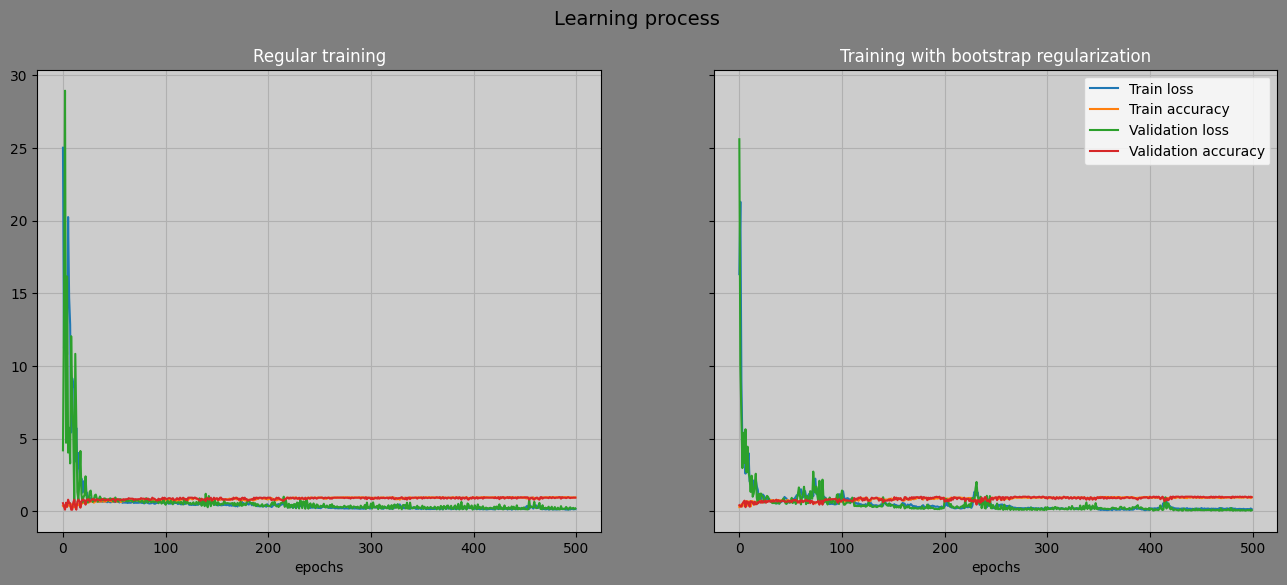

In [16]:
# Now we will vizualize the results of training for both models

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train accuracy', 'Validation loss', 'Validation accuracy'], loc='best')
plt.show()

In [17]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test accuracy': [accuracy_1, accuracy_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


2/2 [==============================] - 0s 10ms/step - loss: 0.1966 - accuracy: 0.9444


,Test accuracy,Test loss
,,
Regular training,0.861111,0.426907
Boostrap regularization,0.944444,0.196575


## Experiment 4
### Sklearn iris dataset

In [18]:
data = load_iris()
X = data['data']
y = data['target']
y = to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RS)
x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [19]:
model_1 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'), 
    Dense(3, activation='softmax')
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/500
2/2 [==============================] - 1s 250ms/step - loss: 1.1378 - accuracy: 0.3542 - val_loss: 1.0193 - val_accuracy: 0.3333
Epoch 2/500
2/2 [==============================] - 0s 46ms/step - loss: 0.9877 - accuracy: 0.4167 - val_loss: 0.9221 - val_accuracy: 0.5833
Epoch 3/500
2/2 [==============================] - 0s 39ms/step - loss: 0.8528 - accuracy: 0.6875 - val_loss: 0.7941 - val_accuracy: 0.5833
Epoch 4/500
2/2 [==============================] - 0s 38ms/step - loss: 0.7367 - accuracy: 0.7083 - val_loss: 0.6973 - val_accuracy: 0.5833
Epoch 5/500
2/2 [==============================] - 0s 37ms/step - loss: 0.6299 - accuracy: 0.7188 - val_loss: 0.6051 - val_accuracy: 0.7083
Epoch 6/500
2/2 [==============================] - 0s 36ms/step - loss: 0.5339 - accuracy: 0.7812 - val_loss: 0.5248 - val_accuracy: 0.9167
Epoch 7/500
2/2 [==============================] - 0s 35ms/step - loss: 0.4573 - accuracy: 0.8646 - val_loss: 0.4389 - val_accuracy: 1.0000
Epoch 8/500
2/2 [==

In [20]:
model_2 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'), 
    Dense(3, activation='softmax')
])

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

df = pd.DataFrame(columns=['loss', 'accuracy', 'val_loss', 'val_accuracy'])

for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 1/50
2/2 [==============================] - 1s 240ms/step - loss: 1.1154 - accuracy: 0.4479 - val_loss: 0.9793 - val_accuracy: 0.6250
Epoch 2/50
2/2 [==============================] - 0s 36ms/step - loss: 0.9287 - accuracy: 0.6979 - val_loss: 0.8986 - val_accuracy: 0.6250
Epoch 3/50
2/2 [==============================] - 0s 37ms/step - loss: 0.8197 - accuracy: 0.6354 - val_loss: 0.7989 - val_accuracy: 0.6250
Epoch 4/50
2/2 [==============================] - 0s 37ms/step - loss: 0.7022 - accuracy: 0.7500 - val_loss: 0.6698 - val_accuracy: 0.7917
Epoch 5/50
2/2 [==============================] - 0s 35ms/step - loss: 0.5840 - accuracy: 0.7500 - val_loss: 0.6095 - val_accuracy: 0.6250
Epoch 6/50
2/2 [==============================] - 0s 37ms/step - loss: 0.5175 - accuracy: 0.6979 - val_loss: 0.5622 - val_accuracy: 0.7500
Epoch 7/50
2/2 [==============================] - 0s 36ms/step - loss: 0.4484 - accuracy: 0.7917 - val_loss: 0.4869 - val_accuracy: 0.9583
Epoch 8/50
2/2 [==========

<ipython-input-20-5fc93ae1cd62>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 38ms/step - loss: 0.1565 - accuracy: 0.9479 - val_loss: 0.3141 - val_accuracy: 0.9583
Epoch 3/50
2/2 [==============================] - 0s 35ms/step - loss: 0.2044 - accuracy: 0.9479 - val_loss: 0.1584 - val_accuracy: 0.9167
Epoch 4/50
2/2 [==============================] - 0s 36ms/step - loss: 0.1668 - accuracy: 0.9167 - val_loss: 0.1640 - val_accuracy: 0.9167
Epoch 5/50
2/2 [==============================] - 0s 38ms/step - loss: 0.1578 - accuracy: 0.9375 - val_loss: 0.2215 - val_accuracy: 0.9583
Epoch 6/50
2/2 [==============================] - 0s 38ms/step - loss: 0.1558 - accuracy: 0.9479 - val_loss: 0.2954 - val_accuracy: 0.9583
Epoch 7/50
2/2 [==============================] - 0s 44ms/step - loss: 0.1953 - accuracy: 0.9479 - val_loss: 0.1410 - val_accuracy: 0.9583
Epoch 8/50
2/2 [==============================] - 0s 37ms/step - loss: 0.1155 - accuracy: 0.9271 - val_loss: 0.1335 - val_accuracy: 0.9167
Epoch 9/50
2/2 [======================

<ipython-input-20-5fc93ae1cd62>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 142ms/step - loss: 0.1026 - accuracy: 0.9479 - val_loss: 0.2604 - val_accuracy: 0.9167
Epoch 2/50
2/2 [==============================] - 0s 68ms/step - loss: 0.1345 - accuracy: 0.9583 - val_loss: 0.1814 - val_accuracy: 0.8750
Epoch 3/50
2/2 [==============================] - 0s 68ms/step - loss: 0.1049 - accuracy: 0.9479 - val_loss: 0.1340 - val_accuracy: 0.9583
Epoch 4/50
2/2 [==============================] - 0s 69ms/step - loss: 0.0972 - accuracy: 0.9583 - val_loss: 0.1334 - val_accuracy: 0.9583
Epoch 5/50
2/2 [==============================] - 0s 53ms/step - loss: 0.0927 - accuracy: 0.9583 - val_loss: 0.1374 - val_accuracy: 0.8750
Epoch 6/50
2/2 [==============================] - 0s 66ms/step - loss: 0.0827 - accuracy: 0.9583 - val_loss: 0.1744 - val_accuracy: 0.8750
Epoch 7/50
2/2 [==============================] - 0s 50ms/step - loss: 0.1013 - accuracy: 0.9375 - val_loss: 0.1474 - val_accuracy: 0.8750
Epoch 8/50
2/2 [=====================

<ipython-input-20-5fc93ae1cd62>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 40ms/step - loss: 0.0239 - accuracy: 0.9896 - val_loss: 0.0896 - val_accuracy: 0.9583
Epoch 3/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0348 - accuracy: 0.9896 - val_loss: 0.1066 - val_accuracy: 0.9583
Epoch 4/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0386 - accuracy: 0.9896 - val_loss: 0.0681 - val_accuracy: 0.9583
Epoch 5/50
2/2 [==============================] - 0s 46ms/step - loss: 0.0268 - accuracy: 0.9896 - val_loss: 0.0426 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0478 - accuracy: 0.9792 - val_loss: 0.0401 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0236 - accuracy: 1.0000 - val_loss: 0.0867 - val_accuracy: 0.9583
Epoch 8/50
2/2 [==============================] - 0s 37ms/step - loss: 0.0382 - accuracy: 0.9896 - val_loss: 0.1440 - val_accuracy: 0.9583
Epoch 9/50
2/2 [======================

<ipython-input-20-5fc93ae1cd62>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 125ms/step - loss: 0.0598 - accuracy: 0.9792 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 2/50
2/2 [==============================] - 0s 52ms/step - loss: 0.0596 - accuracy: 0.9688 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 41ms/step - loss: 0.0223 - accuracy: 0.9896 - val_loss: 6.5030e-04 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 43ms/step - loss: 0.0413 - accuracy: 0.9792 - val_loss: 6.1191e-04 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 59ms/step - loss: 0.0351 - accuracy: 0.9896 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 60ms/step - loss: 0.0369 - accuracy: 0.9896 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 44ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 5.6794e-04 - val_accuracy: 1.0000
Epoch 8/50
2/2 [=========

<ipython-input-20-5fc93ae1cd62>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 44ms/step - loss: 0.0429 - accuracy: 0.9896 - val_loss: 0.1502 - val_accuracy: 0.9583
Epoch 3/50
2/2 [==============================] - 0s 40ms/step - loss: 0.0366 - accuracy: 0.9896 - val_loss: 0.0887 - val_accuracy: 0.9583
Epoch 4/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0238 - accuracy: 0.9896 - val_loss: 0.0831 - val_accuracy: 0.9167
Epoch 5/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0256 - accuracy: 0.9896 - val_loss: 0.0869 - val_accuracy: 0.9583
Epoch 6/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0186 - accuracy: 0.9896 - val_loss: 0.1197 - val_accuracy: 0.9583
Epoch 7/50
2/2 [==============================] - 0s 40ms/step - loss: 0.0275 - accuracy: 0.9896 - val_loss: 0.1244 - val_accuracy: 0.9583
Epoch 8/50
2/2 [==============================] - 0s 37ms/step - loss: 0.0279 - accuracy: 0.9896 - val_loss: 0.0880 - val_accuracy: 0.9583
Epoch 9/50
2/2 [======================

<ipython-input-20-5fc93ae1cd62>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 59ms/step - loss: 0.0392 - accuracy: 0.9896 - val_loss: 0.0370 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 47ms/step - loss: 0.0394 - accuracy: 0.9896 - val_loss: 0.0483 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 45ms/step - loss: 0.0548 - accuracy: 0.9688 - val_loss: 0.0392 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 67ms/step - loss: 0.0450 - accuracy: 0.9792 - val_loss: 0.0504 - val_accuracy: 0.9583
Epoch 6/50
2/2 [==============================] - 0s 65ms/step - loss: 0.0484 - accuracy: 0.9792 - val_loss: 0.0407 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 49ms/step - loss: 0.0422 - accuracy: 0.9792 - val_loss: 0.0418 - val_accuracy: 1.0000
Epoch 8/50
2/2 [==============================] - 0s 47ms/step - loss: 0.0434 - accuracy: 0.9792 - val_loss: 0.0453 - val_accuracy: 0.9583
Epoch 9/50
2/2 [======================

<ipython-input-20-5fc93ae1cd62>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 40ms/step - loss: 0.0299 - accuracy: 0.9896 - val_loss: 0.0432 - val_accuracy: 0.9583
Epoch 3/50
2/2 [==============================] - 0s 44ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0349 - accuracy: 0.9792 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0249 - accuracy: 0.9792 - val_loss: 0.0792 - val_accuracy: 0.9583
Epoch 6/50
2/2 [==============================] - 0s 37ms/step - loss: 0.0412 - accuracy: 0.9688 - val_loss: 0.0479 - val_accuracy: 0.9583
Epoch 7/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0278 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 8/50
2/2 [==============================] - 0s 39ms/step - loss: 0.0431 - accuracy: 0.9792 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 9/50
2/2 [======================

<ipython-input-20-5fc93ae1cd62>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 120ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.1022 - val_accuracy: 0.9583
Epoch 2/50
2/2 [==============================] - 0s 42ms/step - loss: 0.0203 - accuracy: 0.9896 - val_loss: 0.0907 - val_accuracy: 0.9583
Epoch 3/50
2/2 [==============================] - 0s 40ms/step - loss: 0.0175 - accuracy: 0.9896 - val_loss: 0.0542 - val_accuracy: 0.9583
Epoch 4/50
2/2 [==============================] - 0s 62ms/step - loss: 0.0296 - accuracy: 0.9792 - val_loss: 0.0711 - val_accuracy: 0.9583
Epoch 5/50
2/2 [==============================] - 0s 41ms/step - loss: 0.0225 - accuracy: 0.9896 - val_loss: 0.1497 - val_accuracy: 0.9583
Epoch 6/50
2/2 [==============================] - 0s 44ms/step - loss: 0.0401 - accuracy: 0.9792 - val_loss: 0.0638 - val_accuracy: 0.9583
Epoch 7/50
2/2 [==============================] - 0s 42ms/step - loss: 0.0392 - accuracy: 0.9792 - val_loss: 0.0471 - val_accuracy: 0.9583
Epoch 8/50
2/2 [=====================

<ipython-input-20-5fc93ae1cd62>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 48ms/step - loss: 0.0792 - accuracy: 0.9688 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0371 - accuracy: 0.9792 - val_loss: 0.0339 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 39ms/step - loss: 0.0416 - accuracy: 0.9792 - val_loss: 0.0316 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 39ms/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0326 - accuracy: 0.9792 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0415 - accuracy: 0.9688 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 8/50
2/2 [==============================] - 0s 37ms/step - loss: 0.0283 - accuracy: 0.9896 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 9/50
2/2 [======================

<ipython-input-20-5fc93ae1cd62>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


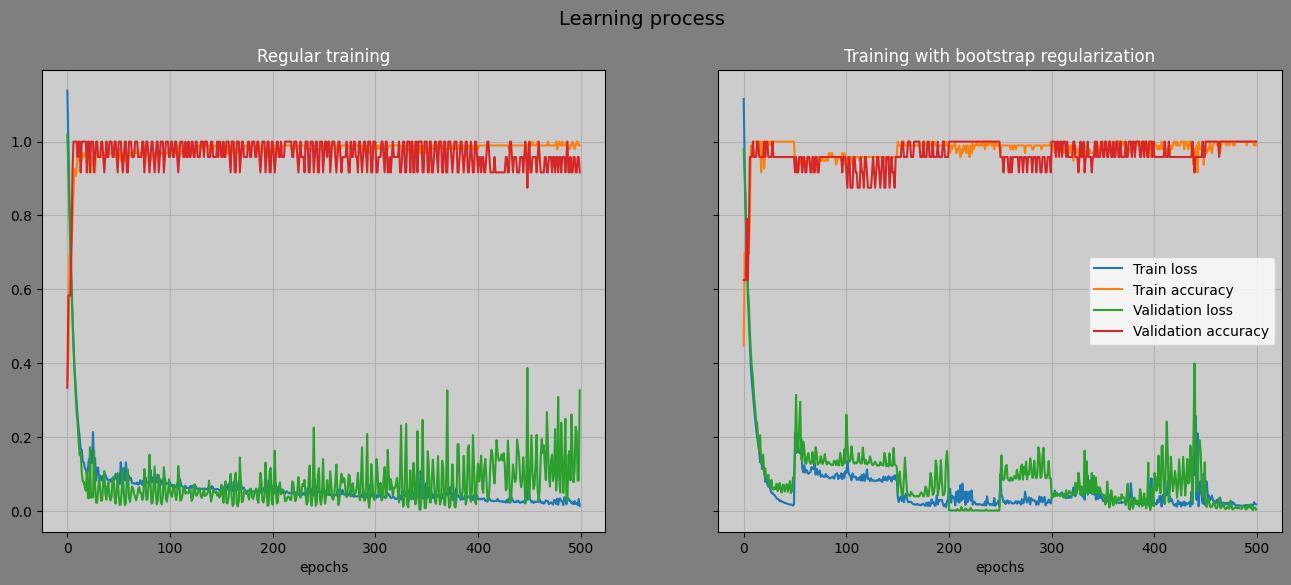

In [21]:
# Now we will vizualize the results of training for both models

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train accuracy', 'Validation loss', 'Validation accuracy'], loc='best')
plt.show()

In [22]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test accuracy': [accuracy_1, accuracy_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


1/1 [==============================] - 0s 156ms/step - loss: 0.0065 - accuracy: 1.0000


,Test accuracy,Test loss
,,
Regular training,0.966667,0.141315
Boostrap regularization,1.000000,0.006484


# Regression

## Experiment 5
### Sklearn diabetes dataset

In [23]:
data = load_diabetes()
X = data['data']
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RS)
x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]


In [24]:
model_1 = Sequential([
    Dense(100, input_dim = INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)]
)

model_1.compile(optimizer='adam', loss="mean_squared_error", metrics=['mean_absolute_error'])

# Train first model

history_1 = model_1.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT)

Epoch 1/500
5/5 [==============================] - 2s 65ms/step - loss: 31497.2871 - mean_absolute_error: 158.5747 - val_loss: 22343.6680 - val_mean_absolute_error: 133.5692
Epoch 2/500
5/5 [==============================] - 0s 23ms/step - loss: 31062.1641 - mean_absolute_error: 157.2245 - val_loss: 21204.2305 - val_mean_absolute_error: 129.2991
Epoch 3/500
5/5 [==============================] - 0s 20ms/step - loss: 28052.4473 - mean_absolute_error: 147.6644 - val_loss: 14824.5195 - val_mean_absolute_error: 102.2594
Epoch 4/500
5/5 [==============================] - 0s 20ms/step - loss: 15240.4893 - mean_absolute_error: 100.8031 - val_loss: 5397.9321 - val_mean_absolute_error: 63.5118
Epoch 5/500
5/5 [==============================] - 0s 20ms/step - loss: 8070.5708 - mean_absolute_error: 75.9863 - val_loss: 4130.4805 - val_mean_absolute_error: 55.3379
Epoch 6/500
5/5 [==============================] - 0s 23ms/step - loss: 5086.9224 - mean_absolute_error: 59.1276 - val_loss: 3814.4468 -

In [25]:
model_2 = Sequential([
    Dense(100, input_dim = INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)]
)

model_2.compile(optimizer='adam', loss="mean_squared_error", metrics=['mean_absolute_error'])

df = pd.DataFrame(columns=['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)

Epoch 1/50
5/5 [==============================] - 2s 69ms/step - loss: 29593.5625 - mean_absolute_error: 154.1982 - val_loss: 27938.2207 - val_mean_absolute_error: 146.9059
Epoch 2/50
5/5 [==============================] - 0s 23ms/step - loss: 29160.4980 - mean_absolute_error: 152.7795 - val_loss: 26524.3281 - val_mean_absolute_error: 142.0738
Epoch 3/50
5/5 [==============================] - 0s 23ms/step - loss: 26246.7637 - mean_absolute_error: 142.5421 - val_loss: 18570.7480 - val_mean_absolute_error: 111.2211
Epoch 4/50
5/5 [==============================] - 0s 22ms/step - loss: 13612.4668 - mean_absolute_error: 92.2718 - val_loss: 8142.5142 - val_mean_absolute_error: 77.5251
Epoch 5/50
5/5 [==============================] - 0s 23ms/step - loss: 8736.5762 - mean_absolute_error: 80.3443 - val_loss: 4954.3994 - val_mean_absolute_error: 59.2201
Epoch 6/50
5/5 [==============================] - 0s 25ms/step - loss: 5927.3545 - mean_absolute_error: 60.6913 - val_loss: 6360.3848 - val_me

<ipython-input-25-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 34ms/step - loss: 2248.3179 - mean_absolute_error: 37.7474 - val_loss: 3146.8413 - val_mean_absolute_error: 44.0878
Epoch 2/50
5/5 [==============================] - 0s 25ms/step - loss: 2234.0830 - mean_absolute_error: 36.3478 - val_loss: 2629.6008 - val_mean_absolute_error: 40.1546
Epoch 3/50
5/5 [==============================] - 0s 21ms/step - loss: 2138.0261 - mean_absolute_error: 36.7876 - val_loss: 3105.0457 - val_mean_absolute_error: 44.0714
Epoch 4/50
5/5 [==============================] - 0s 18ms/step - loss: 2073.6213 - mean_absolute_error: 34.9040 - val_loss: 2728.1379 - val_mean_absolute_error: 40.8331
Epoch 5/50
5/5 [==============================] - 0s 22ms/step - loss: 2052.9700 - mean_absolute_error: 35.9242 - val_loss: 2991.5605 - val_mean_absolute_error: 43.0511
Epoch 6/50
5/5 [==============================] - 0s 20ms/step - loss: 1993.2052 - mean_absolute_error: 34.2052 - val_loss: 2765.7725 - val_mean_absolute_error: 41.02

<ipython-input-25-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 32ms/step - loss: 2613.7944 - mean_absolute_error: 37.1001 - val_loss: 2199.4583 - val_mean_absolute_error: 34.6645
Epoch 2/50
5/5 [==============================] - 0s 25ms/step - loss: 2395.7410 - mean_absolute_error: 36.0838 - val_loss: 2043.1263 - val_mean_absolute_error: 34.3204
Epoch 3/50
5/5 [==============================] - 0s 20ms/step - loss: 2195.5205 - mean_absolute_error: 34.5164 - val_loss: 1849.4340 - val_mean_absolute_error: 35.7091
Epoch 4/50
5/5 [==============================] - 0s 22ms/step - loss: 2317.8401 - mean_absolute_error: 37.2472 - val_loss: 2232.2078 - val_mean_absolute_error: 35.1530
Epoch 5/50
5/5 [==============================] - 0s 24ms/step - loss: 2108.5273 - mean_absolute_error: 35.9123 - val_loss: 1842.1125 - val_mean_absolute_error: 33.9873
Epoch 6/50
5/5 [==============================] - 0s 21ms/step - loss: 2091.3711 - mean_absolute_error: 34.2561 - val_loss: 2058.4587 - val_mean_absolute_error: 37.72

<ipython-input-25-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 32ms/step - loss: 2474.9041 - mean_absolute_error: 36.5433 - val_loss: 1813.6488 - val_mean_absolute_error: 32.9165
Epoch 2/50
5/5 [==============================] - 0s 20ms/step - loss: 1879.9657 - mean_absolute_error: 33.0814 - val_loss: 1674.8363 - val_mean_absolute_error: 32.4537
Epoch 3/50
5/5 [==============================] - 0s 23ms/step - loss: 1626.1676 - mean_absolute_error: 31.6168 - val_loss: 2149.0413 - val_mean_absolute_error: 37.0895
Epoch 4/50
5/5 [==============================] - 0s 19ms/step - loss: 1545.0699 - mean_absolute_error: 30.2967 - val_loss: 2054.7773 - val_mean_absolute_error: 35.3140
Epoch 5/50
5/5 [==============================] - 0s 19ms/step - loss: 1340.5642 - mean_absolute_error: 27.3927 - val_loss: 1701.4460 - val_mean_absolute_error: 32.0904
Epoch 6/50
5/5 [==============================] - 0s 19ms/step - loss: 1074.8483 - mean_absolute_error: 24.6739 - val_loss: 1708.8394 - val_mean_absolute_error: 32.22

<ipython-input-25-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 2/50
5/5 [==============================] - 0s 18ms/step - loss: 1075.0344 - mean_absolute_error: 24.0407 - val_loss: 1328.8282 - val_mean_absolute_error: 27.5382
Epoch 3/50
5/5 [==============================] - 0s 23ms/step - loss: 987.1255 - mean_absolute_error: 23.1269 - val_loss: 1267.9830 - val_mean_absolute_error: 26.4771
Epoch 4/50
5/5 [==============================] - 0s 18ms/step - loss: 942.6039 - mean_absolute_error: 22.5607 - val_loss: 1358.3369 - val_mean_absolute_error: 29.2569
Epoch 5/50
5/5 [==============================] - 0s 22ms/step - loss: 874.4416 - mean_absolute_error: 22.6148 - val_loss: 1122.3076 - val_mean_absolute_error: 23.9179
Epoch 6/50
5/5 [==============================] - 0s 22ms/step - loss: 817.7365 - mean_absolute_error: 21.9441 - val_loss: 1076.2515 - val_mean_absolute_error: 23.0292
Epoch 7/50
5/5 [==============================] - 0s 23ms/step - loss: 736.5459 - mean_absolute_error: 20.5665 - val_loss: 1135.5865 - val_mean_absolute_error:

<ipython-input-25-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 31ms/step - loss: 890.4310 - mean_absolute_error: 19.7750 - val_loss: 1219.6492 - val_mean_absolute_error: 25.9275
Epoch 2/50
5/5 [==============================] - 0s 24ms/step - loss: 818.5732 - mean_absolute_error: 21.6979 - val_loss: 1294.0712 - val_mean_absolute_error: 22.7145
Epoch 3/50
5/5 [==============================] - 0s 24ms/step - loss: 614.0394 - mean_absolute_error: 18.2062 - val_loss: 1136.3712 - val_mean_absolute_error: 24.0945
Epoch 4/50
5/5 [==============================] - 0s 22ms/step - loss: 683.4192 - mean_absolute_error: 20.3788 - val_loss: 1142.6921 - val_mean_absolute_error: 24.8884
Epoch 5/50
5/5 [==============================] - 0s 21ms/step - loss: 541.3039 - mean_absolute_error: 18.1164 - val_loss: 1032.7206 - val_mean_absolute_error: 21.8942
Epoch 6/50
5/5 [==============================] - 0s 19ms/step - loss: 376.7529 - mean_absolute_error: 14.7563 - val_loss: 1066.0057 - val_mean_absolute_error: 21.9989
Epo

<ipython-input-25-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 36ms/step - loss: 718.4781 - mean_absolute_error: 17.5488 - val_loss: 1163.3179 - val_mean_absolute_error: 19.4125
Epoch 2/50
5/5 [==============================] - 0s 23ms/step - loss: 460.0005 - mean_absolute_error: 16.3512 - val_loss: 1017.8192 - val_mean_absolute_error: 21.9432
Epoch 3/50
5/5 [==============================] - 0s 19ms/step - loss: 395.6828 - mean_absolute_error: 15.1857 - val_loss: 1130.3215 - val_mean_absolute_error: 21.8360
Epoch 4/50
5/5 [==============================] - 0s 19ms/step - loss: 390.1663 - mean_absolute_error: 15.3123 - val_loss: 835.3685 - val_mean_absolute_error: 19.9108
Epoch 5/50
5/5 [==============================] - 0s 23ms/step - loss: 295.2677 - mean_absolute_error: 13.3838 - val_loss: 1308.2181 - val_mean_absolute_error: 22.5256
Epoch 6/50
5/5 [==============================] - 0s 23ms/step - loss: 231.9023 - mean_absolute_error: 12.0115 - val_loss: 784.5485 - val_mean_absolute_error: 18.5783
Epoch

<ipython-input-25-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 31ms/step - loss: 528.7939 - mean_absolute_error: 14.2811 - val_loss: 493.3454 - val_mean_absolute_error: 16.9023
Epoch 2/50
5/5 [==============================] - 0s 23ms/step - loss: 398.8880 - mean_absolute_error: 14.8010 - val_loss: 539.4222 - val_mean_absolute_error: 15.5473
Epoch 3/50
5/5 [==============================] - 0s 22ms/step - loss: 287.3224 - mean_absolute_error: 13.1000 - val_loss: 553.0415 - val_mean_absolute_error: 16.3804
Epoch 4/50
5/5 [==============================] - 0s 23ms/step - loss: 286.9435 - mean_absolute_error: 12.8232 - val_loss: 402.0348 - val_mean_absolute_error: 13.0406
Epoch 5/50
5/5 [==============================] - 0s 23ms/step - loss: 238.5510 - mean_absolute_error: 11.4537 - val_loss: 400.3398 - val_mean_absolute_error: 12.7481
Epoch 6/50
5/5 [==============================] - 0s 23ms/step - loss: 212.0476 - mean_absolute_error: 10.9585 - val_loss: 449.5934 - val_mean_absolute_error: 13.5212
Epoch 7/5

<ipython-input-25-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 54ms/step - loss: 354.8404 - mean_absolute_error: 10.6268 - val_loss: 374.9803 - val_mean_absolute_error: 12.9593
Epoch 2/50
5/5 [==============================] - 0s 30ms/step - loss: 318.6039 - mean_absolute_error: 11.5470 - val_loss: 465.2429 - val_mean_absolute_error: 15.2805
Epoch 3/50
5/5 [==============================] - 0s 31ms/step - loss: 274.0437 - mean_absolute_error: 12.1422 - val_loss: 476.5040 - val_mean_absolute_error: 17.7849
Epoch 4/50
5/5 [==============================] - 0s 33ms/step - loss: 338.2574 - mean_absolute_error: 13.7015 - val_loss: 318.8531 - val_mean_absolute_error: 13.4539
Epoch 5/50
5/5 [==============================] - 0s 32ms/step - loss: 343.3621 - mean_absolute_error: 13.8731 - val_loss: 496.2701 - val_mean_absolute_error: 15.2797
Epoch 6/50
5/5 [==============================] - 0s 34ms/step - loss: 252.5217 - mean_absolute_error: 12.0854 - val_loss: 415.5418 - val_mean_absolute_error: 14.2738
Epoch 7/5

<ipython-input-25-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 38ms/step - loss: 378.4763 - mean_absolute_error: 11.3708 - val_loss: 154.5972 - val_mean_absolute_error: 9.4806
Epoch 2/50
5/5 [==============================] - 0s 23ms/step - loss: 281.4108 - mean_absolute_error: 12.2576 - val_loss: 260.5389 - val_mean_absolute_error: 13.5045
Epoch 3/50
5/5 [==============================] - 0s 23ms/step - loss: 267.8312 - mean_absolute_error: 12.9652 - val_loss: 354.6920 - val_mean_absolute_error: 14.3785
Epoch 4/50
5/5 [==============================] - 0s 19ms/step - loss: 314.5749 - mean_absolute_error: 13.4975 - val_loss: 580.5814 - val_mean_absolute_error: 19.5921
Epoch 5/50
5/5 [==============================] - 0s 24ms/step - loss: 562.7056 - mean_absolute_error: 18.7905 - val_loss: 535.6310 - val_mean_absolute_error: 18.3024
Epoch 6/50
5/5 [==============================] - 0s 23ms/step - loss: 396.9755 - mean_absolute_error: 15.7245 - val_loss: 339.2199 - val_mean_absolute_error: 13.4231
Epoch 7/50

<ipython-input-25-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


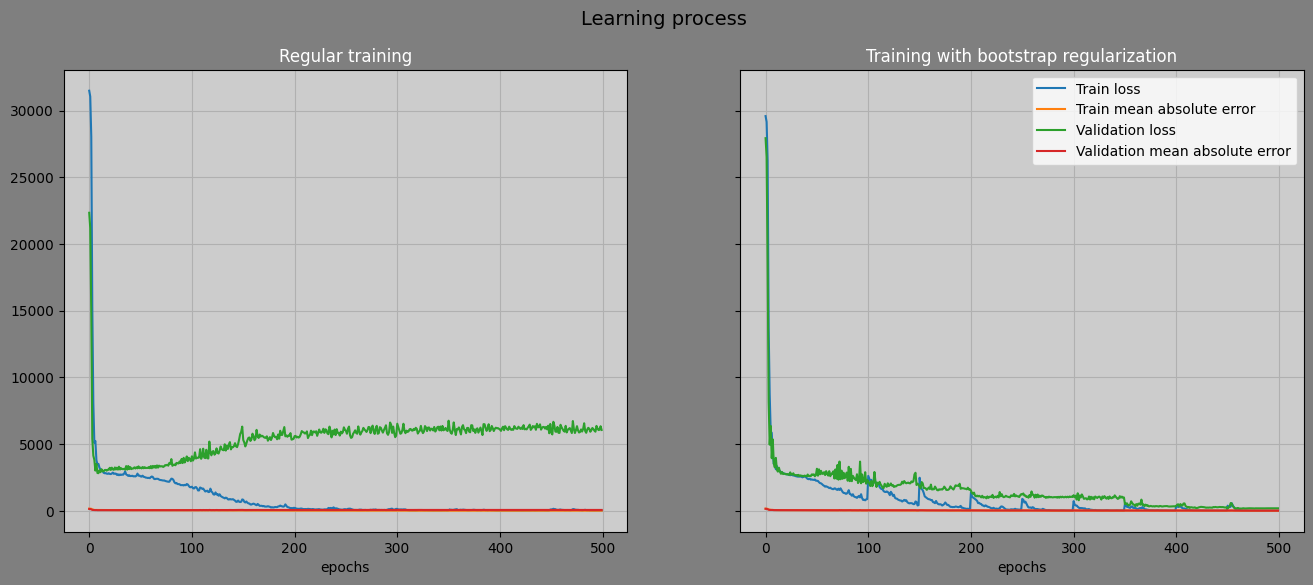

In [26]:
# Now we will vizualize the results of training for both models

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train mean absolute error', 'Validation loss', 'Validation mean absolute error'], loc='best')
plt.show()

In [27]:
loss_1, mae_1 = model_1.evaluate(x_test, y_test)
loss_2, mae_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test mean absolute error': [mae_1, mae_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


3/3 [==============================] - 0s 9ms/step - loss: 4579.7759 - mean_absolute_error: 51.9802


,Test mean absolute error,Test loss
,,
Regular training,60.001373,5836.119141
Boostrap regularization,51.980247,4579.775879


## Experiment 6
### california housing sklearn dataset

In [28]:
data = fetch_california_housing()

y = data['target']
X = data['data']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RS)
x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [29]:
model_1 = Sequential([
    Dense(100, input_dim = INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)]
)

model_1.compile(optimizer='adam', loss="mean_squared_error", metrics=['mean_absolute_error'])

history_1 = model_1.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT)

Epoch 1/500
207/207 [==============================] - 4s 13ms/step - loss: 141.4658 - mean_absolute_error: 2.3220 - val_loss: 2.0149 - val_mean_absolute_error: 1.0544
Epoch 2/500
207/207 [==============================] - 3s 17ms/step - loss: 2.3971 - mean_absolute_error: 1.1175 - val_loss: 1.3571 - val_mean_absolute_error: 0.9348
Epoch 3/500
207/207 [==============================] - 4s 18ms/step - loss: 1.3985 - mean_absolute_error: 0.9337 - val_loss: 1.3570 - val_mean_absolute_error: 0.8641
Epoch 4/500
207/207 [==============================] - 3s 13ms/step - loss: 1.1740 - mean_absolute_error: 0.8498 - val_loss: 1.0372 - val_mean_absolute_error: 0.8018
Epoch 5/500
207/207 [==============================] - 3s 13ms/step - loss: 1.0271 - mean_absolute_error: 0.7732 - val_loss: 0.7098 - val_mean_absolute_error: 0.5990
Epoch 6/500
207/207 [==============================] - 3s 13ms/step - loss: 0.8121 - mean_absolute_error: 0.6817 - val_loss: 0.6772 - val_mean_absolute_error: 0.6621
Ep

In [30]:
model_2 = Sequential([
    Dense(100, input_dim = INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)]
)

model_2.compile(optimizer='adam', loss="mean_squared_error", metrics=['mean_absolute_error'])

df = pd.DataFrame(columns=['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)

Epoch 1/50
207/207 [==============================] - 4s 14ms/step - loss: 94.2456 - mean_absolute_error: 2.0731 - val_loss: 1.3268 - val_mean_absolute_error: 0.8592
Epoch 2/50
207/207 [==============================] - 4s 20ms/step - loss: 1.4619 - mean_absolute_error: 0.9497 - val_loss: 3.8500 - val_mean_absolute_error: 1.6062
Epoch 3/50
207/207 [==============================] - 3s 15ms/step - loss: 1.8734 - mean_absolute_error: 1.0303 - val_loss: 4.0925 - val_mean_absolute_error: 1.4475
Epoch 4/50
207/207 [==============================] - 3s 13ms/step - loss: 1.5528 - mean_absolute_error: 0.9620 - val_loss: 1.2571 - val_mean_absolute_error: 0.9079
Epoch 5/50
207/207 [==============================] - 3s 13ms/step - loss: 1.3267 - mean_absolute_error: 0.9098 - val_loss: 1.1652 - val_mean_absolute_error: 0.8385
Epoch 6/50
207/207 [==============================] - 3s 13ms/step - loss: 1.1347 - mean_absolute_error: 0.8438 - val_loss: 0.8500 - val_mean_absolute_error: 0.6818
Epoch 7/5

<ipython-input-30-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 5s 22ms/step - loss: 0.6045 - mean_absolute_error: 0.5781 - val_loss: 0.5773 - val_mean_absolute_error: 0.5995
Epoch 2/50
207/207 [==============================] - 3s 13ms/step - loss: 0.5454 - mean_absolute_error: 0.5486 - val_loss: 0.5008 - val_mean_absolute_error: 0.5362
Epoch 3/50
207/207 [==============================] - 3s 13ms/step - loss: 0.5531 - mean_absolute_error: 0.5537 - val_loss: 0.4702 - val_mean_absolute_error: 0.5109
Epoch 4/50
207/207 [==============================] - 3s 13ms/step - loss: 0.5316 - mean_absolute_error: 0.5426 - val_loss: 0.4784 - val_mean_absolute_error: 0.5223
Epoch 5/50
207/207 [==============================] - 3s 14ms/step - loss: 0.5362 - mean_absolute_error: 0.5460 - val_loss: 0.5355 - val_mean_absolute_error: 0.5779
Epoch 6/50
207/207 [==============================] - 4s 20ms/step - loss: 0.5461 - mean_absolute_error: 0.5524 - val_loss: 0.4896 - val_mean_absolute_error: 0.5181
Epoch 7/50
207/207 [=

<ipython-input-30-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 3s 14ms/step - loss: 0.4865 - mean_absolute_error: 0.5171 - val_loss: 0.4417 - val_mean_absolute_error: 0.5008
Epoch 2/50
207/207 [==============================] - 3s 13ms/step - loss: 0.4918 - mean_absolute_error: 0.5219 - val_loss: 0.5587 - val_mean_absolute_error: 0.5449
Epoch 3/50
207/207 [==============================] - 3s 16ms/step - loss: 0.4866 - mean_absolute_error: 0.5161 - val_loss: 0.5634 - val_mean_absolute_error: 0.5555
Epoch 4/50
207/207 [==============================] - 4s 20ms/step - loss: 0.4739 - mean_absolute_error: 0.5094 - val_loss: 0.4483 - val_mean_absolute_error: 0.5069
Epoch 5/50
207/207 [==============================] - 3s 13ms/step - loss: 0.4700 - mean_absolute_error: 0.5063 - val_loss: 0.4916 - val_mean_absolute_error: 0.5458
Epoch 6/50
207/207 [==============================] - 3s 13ms/step - loss: 0.4844 - mean_absolute_error: 0.5130 - val_loss: 0.5702 - val_mean_absolute_error: 0.5522
Epoch 7/50
207/207 [=

<ipython-input-30-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 3s 13ms/step - loss: 0.4347 - mean_absolute_error: 0.4819 - val_loss: 0.4863 - val_mean_absolute_error: 0.5440
Epoch 2/50
207/207 [==============================] - 4s 20ms/step - loss: 0.4253 - mean_absolute_error: 0.4770 - val_loss: 0.4375 - val_mean_absolute_error: 0.4729
Epoch 3/50
207/207 [==============================] - 3s 13ms/step - loss: 0.4242 - mean_absolute_error: 0.4771 - val_loss: 0.4773 - val_mean_absolute_error: 0.5306
Epoch 4/50
207/207 [==============================] - 3s 13ms/step - loss: 0.4400 - mean_absolute_error: 0.4859 - val_loss: 0.4350 - val_mean_absolute_error: 0.4725
Epoch 5/50
207/207 [==============================] - 3s 13ms/step - loss: 0.4188 - mean_absolute_error: 0.4746 - val_loss: 0.4180 - val_mean_absolute_error: 0.4705
Epoch 6/50
207/207 [==============================] - 3s 14ms/step - loss: 0.4154 - mean_absolute_error: 0.4726 - val_loss: 0.4736 - val_mean_absolute_error: 0.4815
Epoch 7/50
207/207 [=

<ipython-input-30-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 4s 20ms/step - loss: 0.4140 - mean_absolute_error: 0.4648 - val_loss: 0.3886 - val_mean_absolute_error: 0.4383
Epoch 2/50
207/207 [==============================] - 3s 15ms/step - loss: 0.3969 - mean_absolute_error: 0.4573 - val_loss: 0.3769 - val_mean_absolute_error: 0.4365
Epoch 3/50
207/207 [==============================] - 3s 13ms/step - loss: 0.4101 - mean_absolute_error: 0.4657 - val_loss: 0.4024 - val_mean_absolute_error: 0.4494
Epoch 4/50
207/207 [==============================] - 3s 12ms/step - loss: 0.4092 - mean_absolute_error: 0.4657 - val_loss: 0.4077 - val_mean_absolute_error: 0.4602
Epoch 5/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3884 - mean_absolute_error: 0.4547 - val_loss: 0.3845 - val_mean_absolute_error: 0.4513
Epoch 6/50
207/207 [==============================] - 4s 21ms/step - loss: 0.3969 - mean_absolute_error: 0.4594 - val_loss: 0.3852 - val_mean_absolute_error: 0.4522
Epoch 7/50
207/207 [=

<ipython-input-30-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 3s 12ms/step - loss: 0.4020 - mean_absolute_error: 0.4594 - val_loss: 0.3863 - val_mean_absolute_error: 0.4405
Epoch 2/50
207/207 [==============================] - 3s 12ms/step - loss: 0.3912 - mean_absolute_error: 0.4524 - val_loss: 0.3671 - val_mean_absolute_error: 0.4406
Epoch 3/50
207/207 [==============================] - 3s 15ms/step - loss: 0.4018 - mean_absolute_error: 0.4593 - val_loss: 0.3633 - val_mean_absolute_error: 0.4494
Epoch 4/50
207/207 [==============================] - 4s 20ms/step - loss: 0.3781 - mean_absolute_error: 0.4448 - val_loss: 0.3685 - val_mean_absolute_error: 0.4503
Epoch 5/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3688 - mean_absolute_error: 0.4377 - val_loss: 0.3620 - val_mean_absolute_error: 0.4370
Epoch 6/50
207/207 [==============================] - 3s 12ms/step - loss: 0.3793 - mean_absolute_error: 0.4463 - val_loss: 0.3480 - val_mean_absolute_error: 0.4275
Epoch 7/50
207/207 [=

<ipython-input-30-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 3s 13ms/step - loss: 0.3962 - mean_absolute_error: 0.4519 - val_loss: 0.3459 - val_mean_absolute_error: 0.4154
Epoch 2/50
207/207 [==============================] - 3s 14ms/step - loss: 0.3946 - mean_absolute_error: 0.4472 - val_loss: 0.3712 - val_mean_absolute_error: 0.4287
Epoch 3/50
207/207 [==============================] - 5s 22ms/step - loss: 0.3792 - mean_absolute_error: 0.4445 - val_loss: 0.3571 - val_mean_absolute_error: 0.4220
Epoch 4/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3674 - mean_absolute_error: 0.4391 - val_loss: 0.3644 - val_mean_absolute_error: 0.4326
Epoch 5/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3492 - mean_absolute_error: 0.4310 - val_loss: 0.3462 - val_mean_absolute_error: 0.4281
Epoch 6/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3525 - mean_absolute_error: 0.4294 - val_loss: 0.3374 - val_mean_absolute_error: 0.4225
Epoch 7/50
207/207 [=

<ipython-input-30-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 3s 14ms/step - loss: 0.3818 - mean_absolute_error: 0.4420 - val_loss: 0.3795 - val_mean_absolute_error: 0.4326
Epoch 2/50
207/207 [==============================] - 3s 14ms/step - loss: 0.3730 - mean_absolute_error: 0.4385 - val_loss: 0.3851 - val_mean_absolute_error: 0.4354
Epoch 3/50
207/207 [==============================] - 5s 22ms/step - loss: 0.3792 - mean_absolute_error: 0.4456 - val_loss: 0.3550 - val_mean_absolute_error: 0.4297
Epoch 4/50
207/207 [==============================] - 3s 15ms/step - loss: 0.3528 - mean_absolute_error: 0.4259 - val_loss: 0.3793 - val_mean_absolute_error: 0.4303
Epoch 5/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3574 - mean_absolute_error: 0.4289 - val_loss: 0.3512 - val_mean_absolute_error: 0.4178
Epoch 6/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3463 - mean_absolute_error: 0.4233 - val_loss: 0.3455 - val_mean_absolute_error: 0.4223
Epoch 7/50
207/207 [=

<ipython-input-30-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 3s 14ms/step - loss: 0.3753 - mean_absolute_error: 0.4383 - val_loss: 0.3779 - val_mean_absolute_error: 0.4381
Epoch 2/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3519 - mean_absolute_error: 0.4276 - val_loss: 0.4260 - val_mean_absolute_error: 0.4829
Epoch 3/50
207/207 [==============================] - 4s 20ms/step - loss: 0.3475 - mean_absolute_error: 0.4242 - val_loss: 0.3935 - val_mean_absolute_error: 0.4306
Epoch 4/50
207/207 [==============================] - 3s 15ms/step - loss: 0.3375 - mean_absolute_error: 0.4168 - val_loss: 0.3564 - val_mean_absolute_error: 0.4133
Epoch 5/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3220 - mean_absolute_error: 0.4064 - val_loss: 0.3283 - val_mean_absolute_error: 0.4011
Epoch 6/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3316 - mean_absolute_error: 0.4160 - val_loss: 0.3566 - val_mean_absolute_error: 0.4383
Epoch 7/50
207/207 [=

<ipython-input-30-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 3s 14ms/step - loss: 0.3612 - mean_absolute_error: 0.4324 - val_loss: 0.3575 - val_mean_absolute_error: 0.4345
Epoch 2/50
207/207 [==============================] - 3s 16ms/step - loss: 0.3317 - mean_absolute_error: 0.4164 - val_loss: 0.3374 - val_mean_absolute_error: 0.4288
Epoch 3/50
207/207 [==============================] - 4s 21ms/step - loss: 0.3276 - mean_absolute_error: 0.4145 - val_loss: 0.3491 - val_mean_absolute_error: 0.4296
Epoch 4/50
207/207 [==============================] - 3s 14ms/step - loss: 0.3375 - mean_absolute_error: 0.4227 - val_loss: 0.3546 - val_mean_absolute_error: 0.4283
Epoch 5/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3093 - mean_absolute_error: 0.4035 - val_loss: 0.3499 - val_mean_absolute_error: 0.4419
Epoch 6/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3066 - mean_absolute_error: 0.4016 - val_loss: 0.3467 - val_mean_absolute_error: 0.4220
Epoch 7/50
207/207 [=

<ipython-input-30-c33a0899991c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


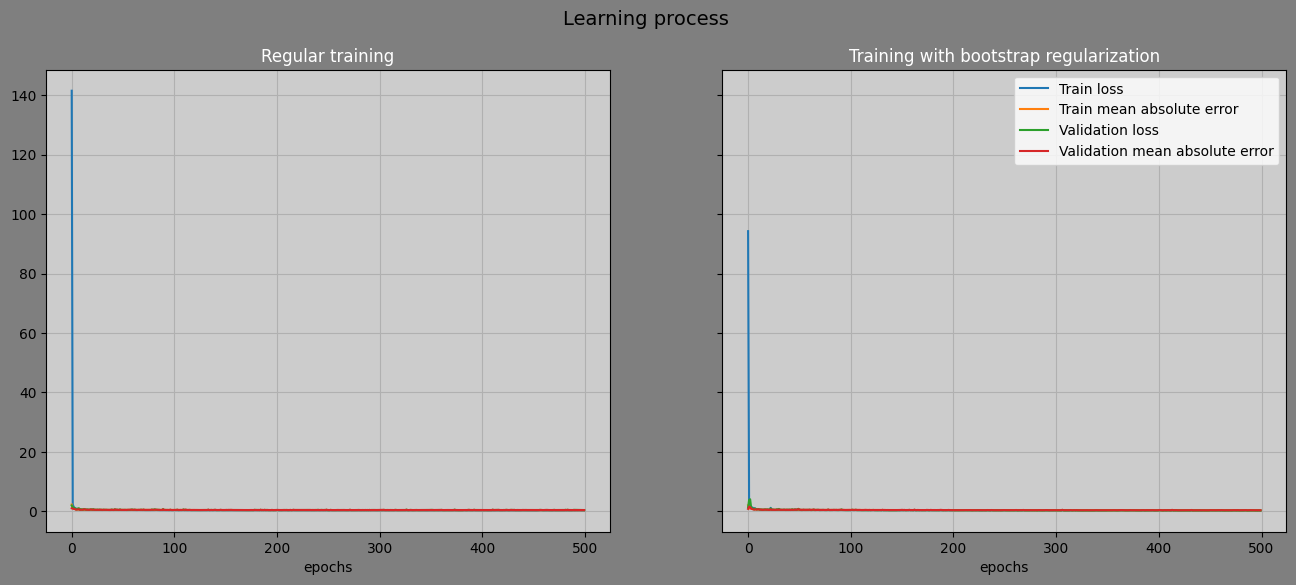

In [31]:
# Now we will vizualize the results of training for both models

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train mean absolute error', 'Validation loss', 'Validation mean absolute error'], loc='best')
plt.show()

In [32]:
loss_1, mae_1 = model_1.evaluate(x_test, y_test)
loss_2, mae_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test mean absolute error': [mae_1, mae_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


129/129 [==============================] - 1s 3ms/step - loss: 0.4898 - mean_absolute_error: 0.4801


,Test mean absolute error,Test loss
,,
Regular training,0.478628,0.472366
Boostrap regularization,0.480101,0.489812
